In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math


In [4]:
## Задание 1.

In [5]:
A = np.array([[10, 12, 3],
              [12, 15, 12],
              [3,  12, 10]])

#ij=ji=n+1-i,n+1-j


|z-10|<=15
|z-15|<=24
|z-10|<=15


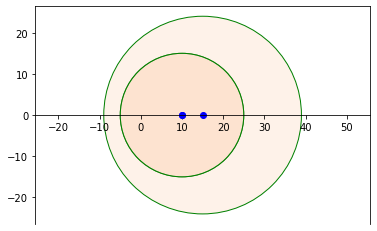

In [6]:
z = []
for i in range(0, len(A)):
    row_sum = 0
    for j in range(0, len(A)):
        if i != j:
            row_sum += abs(A[i][j])
    z.append((A[i][i], row_sum))
    print(f"|z-{A[i][i]}|<={row_sum}")

fig, ax = plt.subplots()
ax.spines["bottom"].set_position(("data", 0))
for i in range(0, len(A)):
    ax.add_patch(plt.Circle((z[i][0], 0), z[i][1], facecolor="#FDD6BB50", edgecolor="green"))
    plt.plot(z[i][0], 0, marker="o", color="blue")

ax.set_aspect('equal', adjustable='datalim')
ax.plot()  
plt.show()

In [7]:
def max_power_iteration(A, b0, eps):
    b_k = [b0]
    lambd = [0]
    while True:
        b_k1 = np.dot(A, b_k[-1])
        norm_b_k1 = max(b_k1,key=abs)
        norm_b_k = max(b_k[-1],key=abs)
        lambd.append(norm_b_k1 / norm_b_k)
     
        b_k.append(b_k1)

        if abs(lambd[-1] - lambd[-2]) < eps:
            break
    return lambd[-1]

def min_power_iteration(A, b0, eps):
    b_k = [b0]
    lambd = [0]
    while True:
        b_k1 = np.linalg.solve(A, b_k[-1])
        norm_b_k1 = max(b_k1,key=abs)
        norm_b_k = max(b_k[-1],key=abs)
        lambd.append(norm_b_k / norm_b_k1)
        
        b_k.append(b_k1)

        if abs(lambd[-1] - lambd[-2]) < eps:
            break
    return lambd[-1]


b0 = np.random.rand(len(A))

print(f'max eigenvalue={max_power_iteration(A, b0, 10 ** -6)}')
print(f'min eigenvalue={min_power_iteration(A, b0, 10 ** -6)}')
print(np.linalg.eigvals(A))

max eigenvalue=31.000000011972663
min eigenvalue=-3.0000000535105116
[31.  7. -3.]


In [8]:
B = np.array([[2, -1,  0, 0],
              [-1, 2, -1, 0],
              [0, -1,  2, -1],
              [0,  0, -1, 2]])

b0 = np.random.rand(len(B))
min_lambda = min_power_iteration(B, b0, 10 ** -6)

for i in range(0, len(B)):
    B[i][i] -= 4
    
print(f'p(A-4I) = {abs(max_power_iteration(B, b0, 10 ** -6))} \n|lambda -4|={abs(min_lambda - 4)}')

p(A-4I) = 3.618031776792982 
|lambda -4|=3.618033743059082


## Задание 2.

eigenvalues: [1.0294742306766116, 1.114503033223913, 1.2473201220472363, 1.4146006051045252, 1.6000672531034366, 1.785798993836873, 1.9545354143050244, 2.088371040182304, 2.1653293075200852]

максимальная ошибка вычисления = 0.005304602257007129 (при количестве итераций = 50)


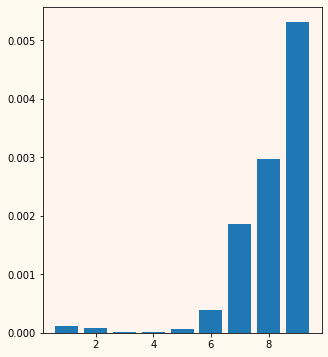

In [34]:
def create_matrix(m, alpha):
    A = []
    for i in range(0, m - 1):
        A.append([])
        for j in range(0, m - 1):
            if i == j:
                A[i].append(1 + 2 * alpha)
            elif abs(i - j) == 1:
                A[i].append(-alpha)
            else:
                A[i].append(0)
    return np.array(A)

def get_norm_vector(x):
    sum = 0
    for val in x:
        sum += val ** 2
    return math.sqrt(sum)

def get_minor(A, i):
    for n in range(i, len(A)):
        A[i][n] = 0
        A[n][i] = 0
    A[i][i] = 1
    return A

def qr(A, num):
    k = 0
    while k < num: 
        I = np.eye(len(A))
        Q_i = []
        QA = A
        A_i = A
        R = A
        for i in range(0, len(A) - 1):
            x = A_i.transpose()[i]
            alpha = get_norm_vector(x)
            e = np.array([0. if j != i else 1. for j in range(0, len(A))])
            u = x - e.dot(alpha)
            v = np.array([u / get_norm_vector(u)])
            Q_i.append(I - 2 * v * v.transpose())
            QA = Q_i[-1].dot(QA)
            A_i = get_minor(QA, i)
            R = Q_i[-1].dot(R)

        Q = Q_i[0].transpose()
        for i in range(1, len(Q_i)):
            Q = Q.dot(Q_i[i].transpose())
        A = R.dot(Q)
        k += 1
    result = []
    for i in range(0, len(A)):
        result.append(A[i][i])
    return result


def eigenvalues(m, alpha):
    return [1 + 4 * alpha * (np.sin(np.pi * i / (2 * m)) ** 2) for i in range(1, m)]


m = 10
alpha = 0.3
num_operations = 50


A = create_matrix(m, alpha)  
qr_val = qr(A, num_operations)
qr_val.sort()
e_val = eigenvalues(m, alpha)
e_val.sort()

err = max(abs(np.array(qr_val) - np.array(e_val)))

print(f"eigenvalues: {qr_val}\n")
print(f"максимальная ошибка вычисления = {err} (при количестве итераций = {num_operations})")

x = np.arange(1, m)
y = abs(np.array(qr_val) - np.array(e_val))

fig, ax = plt.subplots()

ax.bar(x, y)

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(5)   
fig.set_figheight(6)

plt.show()
# print(np.linalg.eigvals(A))

### Аналитическое решение
<p>Для того,чтобы выполнялось условие,необходимо,чтобы минимальное собственное значение исходной матрицы было больше единицы.
$$ 1+4\alpha sin^2(\frac{\pi i}{2 m}) > 1 $$
$$sin^2(\frac{\pi i}{2 m})>0 $$

<p>Как видно данное условие выплнено для всех m

## Задание 3.
Известно, что определитель матрицы равен произведению собственных значений. Покажем это, используя qr

In [10]:
A = np.array([[10, 13, 4],
              [10, 15, 2],
              [14,  15, 0]])

qr_val = qr(A, 100)
res = 1
for val in qr_val:
    res *= val
print(res)
print(np.linalg.det(A))

-176.00000466023755
-175.99999999999991


## Задание 4.

In [13]:
def JacMethod(M, e=0.01):
    M, N, H = np.copy(M), len(np.copy(M)), np.eye(len(np.copy(M)))
    while True:
        max, i, j = M[0][1], 0, 1
        for x in range(0, N):
            for y in range(1 + x, N):
                if M[x][y] > max:
                    max, i, j = M[x][y], x, y
        if max < e:
            return H, M, M.diagonal()
        deg = (1 / 2) * math.atan((2 * M[i][j]) / (M[i][i] - M[j][j]))
        sin, cos = math.sin(deg), math.cos(deg)
        turn_matrix = np.eye(N)
        turn_matrix[i][i], turn_matrix[j][j], turn_matrix[i][j],turn_matrix[j][i] = cos, cos, -sin, sin
        turn_matrix_t =np.transpose(turn_matrix)
        H, M = np.dot(H, turn_matrix), np.dot(turn_matrix_t, M).dot(turn_matrix)

def CovariationMatrix(M):
    A = np.copy(M)
    M, std = np.mean(A, axis=0), np.std(A, axis=0, dtype=np.float64)    # standard deviation
    for j, s in enumerate(std):
        if np.abs(s)<1e-12:
            continue
        else:
            for i in range(np.shape(A)[0]):
                A[i, j] = (A[i, j]-M[j])
    COV = np.dot(np.transpose(A), A)
    return A, COV

def cleanData(A, U, H):
    H=np.diag(H)
    args, sort =np.argsort(H), sorted(H)
    U=np.transpose(np.transpose(U)[args])
    H=np.transpose(np.transpose(H)[args])
    H, U=np.transpose(np.transpose(H)[np.array(sort)>1]), np.transpose(np.transpose(U)[np.array(sort)>1])
    M=np.dot(A,U)
    return M

In [33]:
import numpy as np
import pandas as pd
from copy import copy


file = 'forPCAanalysis.xls'
xl = pd.ExcelFile(file)
data = xl.parse('данные')
print(data[:5])
n = data['национальность']
g = data['пол']
num = data['LP']
temp = {}
count = 0
for i in n.keys():
    if n[i] not in temp:
        temp[n[i]] = count
        count += 1
        n[i] = temp[n[i]]
    else:
        n[i] = temp[n[i]]
        continue
temp.clear()
count = 0
for i in g.keys():
    if g[i] not in temp:
        temp[g[i]] = count
        count += 1
        g[i] = temp[g[i]]
    else:
        g[i] = temp[g[i]]
        continue
for i in num.keys():
    num[i] = 1
print('\n\n', data[:5])

g, age = copy(data).drop(['национальность', 'возраст'], axis=1), copy(data).drop(['национальность','пол'], axis=1) #данные  с полом, возрастом + тесты
n, tests = copy(data).drop(['пол', 'возраст'], axis=1), copy(data).drop(['пол','возраст','национальность'],axis=1)

centreM, gender_covariation_matrix=CovariationMatrix(np.array(g.values[1:, 1:]))
J = JacMethod(gender_covariation_matrix)
vec, val= J[0], J[1]
genderPca= cleanData(centreM, vec, val)

centreM, ageCovariationMatrix=CovariationMatrix(np.array(age.values[1:, 1:]))
J = JacMethod(ageCovariationMatrix)
vec, val = J[0], J[1]
agePca=cleanData(centreM, vec, val)

centreM, nation_covariation_matrix=CovariationMatrix(np.array(n.values[1:, 1:]))
J = JacMethod(nation_covariation_matrix)
vec, val= J[0], J[1]
nationPca = cleanData(centreM, vec, val)

centreM, test_covariation_matrix=CovariationMatrix(np.array(tests.values[1:, :]))
J = JacMethod(test_covariation_matrix)
vec, val= J[0], J[1]
test_pca=cleanData(centreM, vec, val)

print(np.linalg.norm(np.abs(agePca - test_pca)), np.linalg.norm(np.abs(nationPca -
test_pca)),np.linalg.norm(np.abs(genderPca - test_pca)), sep='\n')

   LP национальность      пол возраст тестА1 ТестА2 ТестВ1     U1     U2  \
0  Y1             Y2       Y3      Y4     X1     X2     X3     X4     X5   
1   1       французы  женщина       6  77.14  65.71  82.86  82.86  85.71   
2   2       французы  женщина       6  68.57  62.86     80  91.43  88.57   
3   3       французы  мужчина       6  74.29  62.86     80  85.71  82.86   
4   4       французы  женщина       6  71.43  65.71  82.86  88.57  91.43   

  ТестAсс ТестНе  
0      X6     X7  
1      20  77.14  
2   17.14  74.29  
3   22.86  68.57  
4   14.29  77.14  


   LP национальность пол возраст тестА1 ТестА2 ТестВ1     U1     U2 ТестAсс  \
0  1              0   0      Y4     X1     X2     X3     X4     X5      X6   
1  1              1   1       6  77.14  65.71  82.86  82.86  85.71      20   
2  1              1   1       6  68.57  62.86     80  91.43  88.57   17.14   
3  1              1   2       6  74.29  62.86     80  85.71  82.86   22.86   
4  1              1   1       6  71.

Проанализировав результаты можно сделать вывод, что возраст в
большей степени влияет на показания тестов, чем национальность и пол